# Homework, Week 17, Heather Leighton-Dick

## 1.	What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

Inductive reasoning is a logical process by which an example leads to inferences about other instances like the example (data collection --> data analysis (patterns) --> theory that explains the patterns in data collected). I could use inductive reasoning by recording all the birds that come to the feeder on my deck during the month of December and again during the month of February, comparing the numbers and looking for patterns or differences between the two months, and coming up with a hypothesis that might explain why those differences occurred.

Deductive reasoning goes logically from a general theory or set of facts to a specific inference (theory --> test the theory by making observations). Continuing with the birds on my deck, I would use deductive reasoning by beginning with the general theory that birds eat seeds and taking a set of observations that prove or disprove the theory.

good resource:
https://scientificinquiryinsocialwork.pressbooks.com/chapter/6-3-inductive-and-deductive-reasoning/

## 2–6 Regression Models on the Abalone dataset

[Using ONE of the following sources, complete the questions for only that source. 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3.

Note: at least one of your models should have the most relevant performance metric above 0.90. All performance metrics should be above 0.75. You will partially be graded on model performance.]

### information from the dataset webpage:

Data Set Information:

"From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200)."


Attribute Information:

"Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem." 

### Name / Data Type / Measurement Unit / Description 
----------------------------- 
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement 

Diameter / continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous / grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years 

## 2.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t.

### Scaling and dealing with null values were not necesary. I checked dtypes and made sure that there weren't any extra spaces in the data. OneHotCoding of the 'Sex' column (category dtype) turned out to be superfluous because I ended up dropping that column.

In [73]:
#everything and the kitchen sink
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics, sklearn.compose
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

#importing, checking column dtypes
abalone_df = pd.read_csv("abalone.csv", delimiter=',')
abalone_df.columns = abalone_df.columns.str.replace(' ', '')

#abalone_df["Sex"] = abalone_df["Sex"].astype(str)
#abalone_df.info()

In [129]:
#preprocessing -- looking for ?'s and replacing with NaN
abalone_df.replace('?', np.nan)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [130]:
#preprocessing -- looking for missing values -- No missing values
abalone_df.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [128]:
abalone_df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### Process Note: Trying to OneHotEncode the "Sex" column was a trial, and led to a lot of value errors even after the encoding. I decided to to drop the column in favor of other information.

### I also thought about adding an 'Age' column but decided it would duplicate the 'Rings' column needlessly.

In [40]:
#preprocessing -- converting column 'Sex' from string variable to categorical variable
#abalone_df['Sex'] = abalone_df['Sex'].astype("category")

#applying OneHotEncoder to column for categorical variable 'Sex' (M, F, or I)
#enc = OneHotEncoder()
#abalone_df["Sex"] = abalone_df["Sex"]
#enc.fit(abalone_df["Sex"])
#OneHotEncoder()
#enc.transform(abalone_df["Sex"])

#ohe = OneHotEncoder(drop='first')
#ohe.fit_transform(abalone_df.Sex.values.reshape(-1, 1)).toarray()

#ohe = OneHotEncoder(drop='first')
#add "Sex" column to scaled df
#abex = abalone_df["Sex"]
#abalone_sc_df = abalone_sc_df.join(abex)

#abalone_dfc = pd.get_dummies(abalone_df, columns=["Sex"], prefix=['status'])

#preprocessing -- later warnings that str could not be converted to a float mean that there is a string value somewhere
#abalone_df.columns = abalone_df.columns.str.replace(' . ', '0')

#preprocessing -- adding column 'Age' with value "'Rings' + 1.5" per dataset 'Rings' column description
#abalone_df['Age'] = abalone_df.apply(lambda row: row.Rings + 1.5, axis=1)


In [131]:
abalone_dfc = abalone_df.drop(columns=['Sex'], axis=1)

In [ ]:
#preprocessing -- (scaling via ANN (per dataset notes) has already been performed)

In [132]:
#train test split
X = abalone_dfc.drop("Rings", axis = 1)   #Feature Matrix
y = abalone_dfc[["Rings"]] #Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

### I chose a decision tree regressor model, beginning with max_depth=6 and working up by 2s to 10, which gave the best score. I started min_samples_leaf at 0.13 and tried rounding the hundredths place up and down; 0.1 worked best. Criterion='friedman_mse' and 'poisson' increased the RMSE. Adding a K-fold CV to the model increased RMSE.

In [138]:
#DecisionTreeRegression

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.1, criterion='squared_error', random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# y_pred
y_pred = dt.predict(X_test)

# mse_dt
mse_dt = MSE(y_test, y_pred)

# rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print('Regression Tree test set RMSE: {:.3f}'.format(rmse_dt))

Regression Tree test set RMSE: 2.406


In [139]:
#finding the MSE and RMSE of a K-Fold CV decision tree regressor (average of errors of each of 10 folds)
MSE_CV = -cross_val_score(dt, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error', n_jobs=-1)
RMSE_CV = (MSE_CV.mean()) ** (1/2)

print('MSE_CV = {:.3f}'.format(MSE_CV.mean()))
print('RMSE_CV = {:.3f}'.format(RMSE_CV))

MSE_CV = 6.174
RMSE_CV = 2.485


In [140]:
#finding out how each subset performed
y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)

MSE_pred_train = MSE(y_train, y_predict_train)
MSE_pred_test = MSE(y_test, y_predict_test)

RMSE_pred_train = (MSE(y_train, y_predict_train)) ** (1/2)
RMSE_pred_test = (MSE(y_test, y_predict_test)) ** (1/2)

print('MSE training score = {:.3f}'.format(MSE_pred_train))
print('MSE test data score = {:.3f}'.format(MSE_pred_test))
print('RMSE training score = {:.3f}'.format(RMSE_pred_train))
print('RMSE test data score = {:.3f}'.format(RMSE_pred_test))

MSE training score = 5.943
MSE test data score = 5.791
RMSE training score = 2.438
RMSE test data score = 2.406


### Trying to fit a GridSearchCV on the training data produced "ValueError: Classification metrics can't handle a mix of multiclass and continuous targets" and I was unable to resolve it.

In [144]:
params_dt = {'max_depth': [2,4,6,8,10], 'min_samples_leaf': [0.1, 0.13, 0.16, 0.2], 'max_features': [0.2, 0.4, 0.6]}

grid_dt = GridSearchCV(estimator = dt, param_grid= params_dt, scoring='accuracy', cv=10, n_jobs=-1)

# at this point, ValueError: Classification metrics can't handle a mix of multiclass and continuous targets
#grid_dt.fit(X_train, y_train)

#best_hyperparams = grid_dt.best_params_
#print(best_hyperparams)

#best_CV_score = grid_dt.best_score_
#print(best_CV_score)

#best_model = grid_dt.best_estimator_

#test_acc = best_model.score(X_test, y_test)

## 4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

### An initial basic random forest regressor trial came in with a score of 2.218, which I reduced somewhat by raising the n_estimators and adding a criterion of 'absolute_error' (criterion='poisson' resulted in a increase of over 1.0 to 3.2). The minimum required samples per leaf turned out to be extremely low (0.001).

### Final parameter meddling resulted in RMSE=2.197. 

### Then, I used the GridSearchCV method to identify the best model possible, which scored an RMSE of 2.197.

In [156]:
# Instantiate rf
rf = RandomForestRegressor(max_depth=10, n_estimators=25, min_samples_leaf=0.0001, criterion='absolute_error', random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))


Test set RMSE of rf: 2.197


In [150]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2,10,30]}


#Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels, warnings generated but calculation still performed
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [157]:
# Compute rmse_test
rmse_test = (MSE(y_test, y_pred)) ** (1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

#print best_model
print(best_model)

Test RMSE of best model: 2.197
RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2', min_samples_leaf=2, random_state=42)


## 5.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

### The xgboost model does better with a max_depth of 5 (rather than 10 like the dt and rf models). The number of estimators I increased to 100 from 25; changes to the colsample_bytree did not seem to affect the RMSE as significantly, but an increase from 0.3 to 0.5 shaved off almost a tenth.

### Strangely, the GridSearchCV turned up an RMSE greater than the one I came up with -- 2.186 > 2.197.

In [123]:
# check xgboost version
import xgboost as xgb
print(xgboost.__version__)

0.80


In [124]:
#xgboost
xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

#evaluate
rmse = (MSE(y_test, preds)) ** (1/2)

print('RMSE: {:.3f}'.format(rmse))

RMSE: 2.186


In [163]:
# Define the dictionary 'params_rf'
params_xg_reg = {'learning_rate':[0.1, 0.01, 0.05]}


#Instantiate grid_rf
grid_xg_reg = GridSearchCV(estimator=xg_reg,
                       param_grid=params_xg_reg,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_xg_reg.fit(X_train, y_train)

# Extract the best estimator
best_model_xg = grid_xg_reg.best_estimator_

# Predict test set labels, warnings generated but calculation still performed
y_pred_xg = best_model_xg.predict(X_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [164]:
# rmse_test
rmse_test = (MSE(y_test, y_pred)) ** (1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

#print best_model
print(best_model_xg)

Test RMSE of best model: 2.197
XGBRegressor(alpha=10, colsample_bytree=0.5, max_depth=5)


## 6.	Which model performed best? What is your performance metric? Why?

### The random forest regressor and the xgboost models performed better than the decision tree regressor: 
### (dt RMSE (2.406) > rf RMSE (2.197) and xg RMSE (2.186)

### Since I used regressor models (because the prediction column is a continuous value instead of classified/binary), I used the root mean squared error (RMSE) as my performance metric. 

## Machine Learning Tree-Based Models DataCamp cert

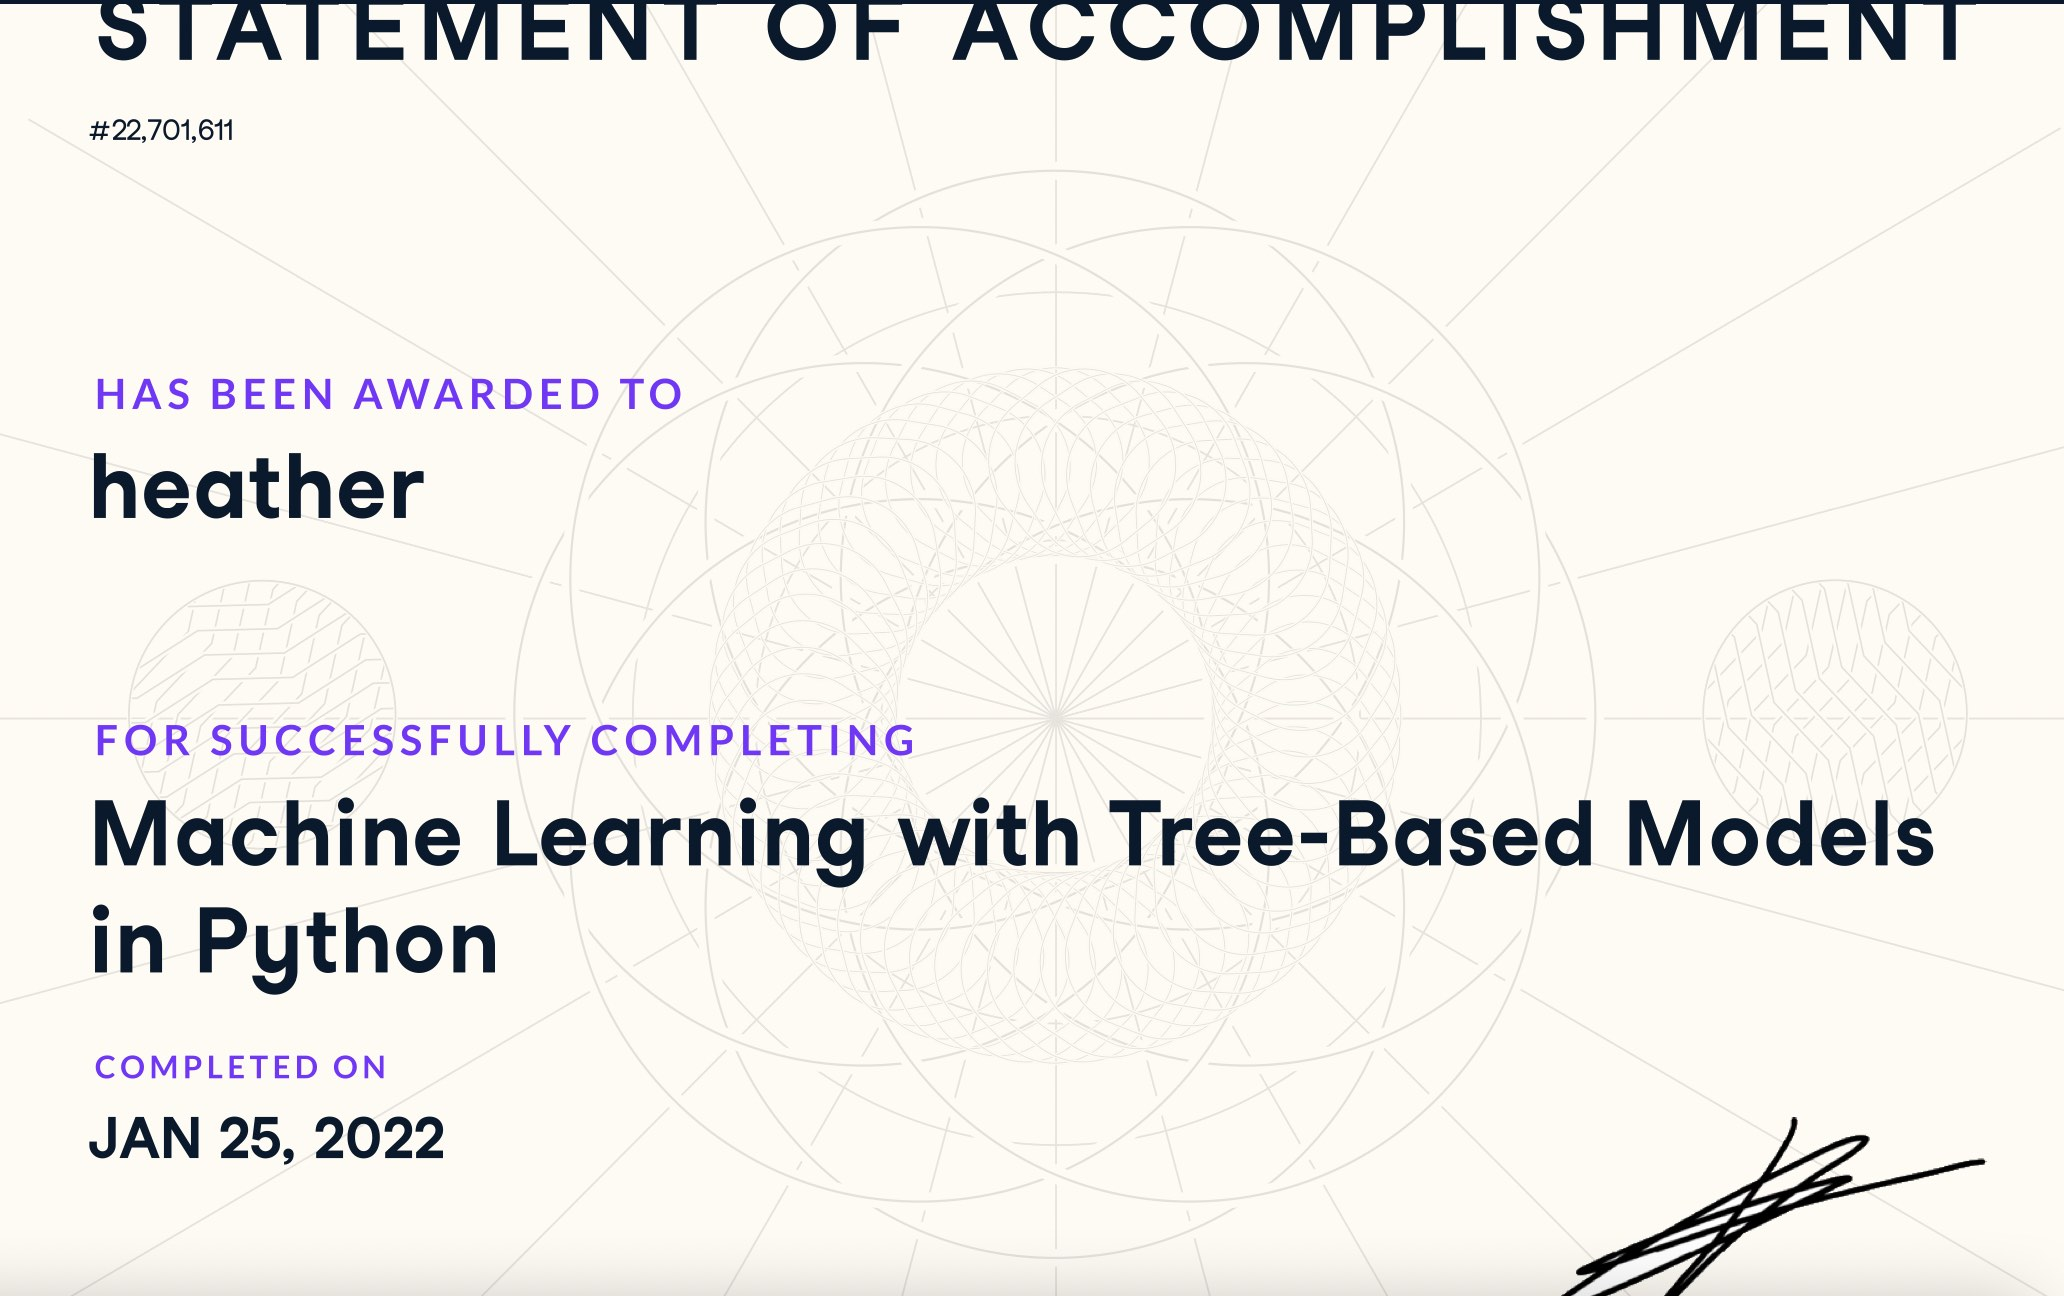